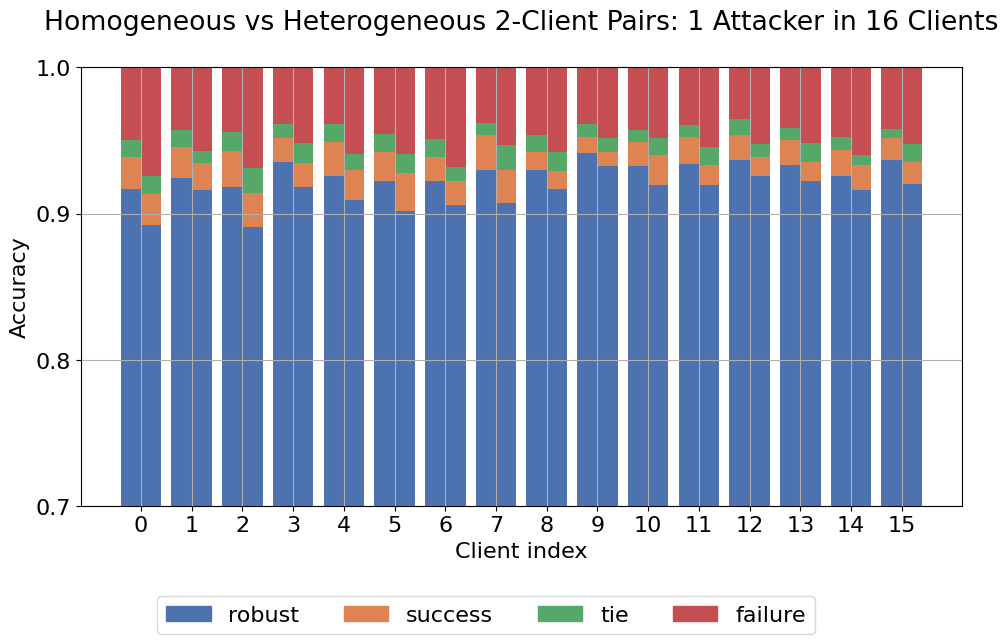

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
plt.rcParams.update({'font.size': 16})
# ① 読み込むファイル群を指定（必要に応じてパスを調整）
file_paths = [
    "../../experiments/MNIST_cl16_attc2_datasize6000_groups[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15]]_ep400_alpha10.0_20250630_215453/experiment_info.json",
    "../../experiments/MNIST_cl16_attc2_datasize6000_groups[[0, 8], [1, 9], [2, 10], [3, 11], [4, 12], [5, 13], [6, 14], [7, 15]]_ep400_alpha10.0_20250630_225825/experiment_info.json"
]
metric_colors = {
    'rob': '#4C72B0',
    'suc': '#DD8452',
    'tie': '#55A868',
    'fai': '#C44E52'
}
# ② 各ファイルから必要データだけ抽出
data_list = []
for path in file_paths:
    with open(path, 'r') as f:
        d = json.load(f)
    data_list.append({
        'groups': d['groups'],
        'rob':    d['rob'],
        'suc':    d['suc'],
        'tie':    d['tie'],
        'fai':    d['fai'],
        'label':  path.split('/')[-1].replace('.json','')  # グラフのタイトル用
    })


# 色の設定
metric_colors = {
    'robust': '#4C72B0',
    'success': '#DD8452',
    'tie': '#55A868',
    'failure': '#C44E52'
}

m = len(data_list)
n = len(data_list[0]['rob'])
x = np.arange(n)
total_width = 0.8
width = total_width / m
offsets = (np.arange(m) - (m-1)/2) * width

fig, ax = plt.subplots(figsize=(6 + m*2, 6))
ax.grid(True)
# プロット
for i, dicts in enumerate(data_list):
    rob = dicts['rob']
    suc = dicts['suc']
    tie = dicts['tie']
    fai = dicts['fai']
    xpos = x + offsets[i]
    ax.bar(xpos, rob, width, color=metric_colors['robust'])
    ax.bar(xpos, suc, width, bottom=rob, color=metric_colors['success'])
    ax.bar(xpos, tie, width, bottom=np.array(rob)+np.array(suc), color=metric_colors['tie'])
    ax.bar(xpos, fai, width, bottom=np.array(rob)+np.array(suc)+np.array(tie), color=metric_colors['failure'])

# 軸設定
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in x])
ax.set_xlabel('Client index')
ax.set_ylabel('Accuracy')
ax.set_yticks(np.arange(0.7, 1.01, 0.1))
ax.set_ylim(0.7, 1.0)
# 共通凡例
handles = [mpatches.Patch(color=c, label=label) for label, c in metric_colors.items()]
fig.legend(handles=handles, ncol=4, loc='lower center', bbox_to_anchor=(0.5, -0.1))
ax.set_title('Homogeneous vs Heterogeneous 2-Client Pairs: 1 Attacker in 16 Clients\n')

plt.tight_layout()
plt.show()
